In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

#import all necessary layers
from tensorflow.keras.layers import Input, DepthwiseConv2D
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import ReLU, AvgPool2D, Flatten, Dense
from tensorflow.keras import Model

In [3]:
train_ds="/kaggle/input/birds-20-species-image-classification/train"
test_ds="/kaggle/input/birds-20-species-image-classification/test"
validation_ds="/kaggle/input/birds-20-species-image-classification/valid"

In [4]:
batch_size = 32
img_size = 224

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )

val_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,  
                                                target_size=(img_size, img_size), 
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')  

validation_generator = val_datagen.flow_from_directory(validation_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 3208 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


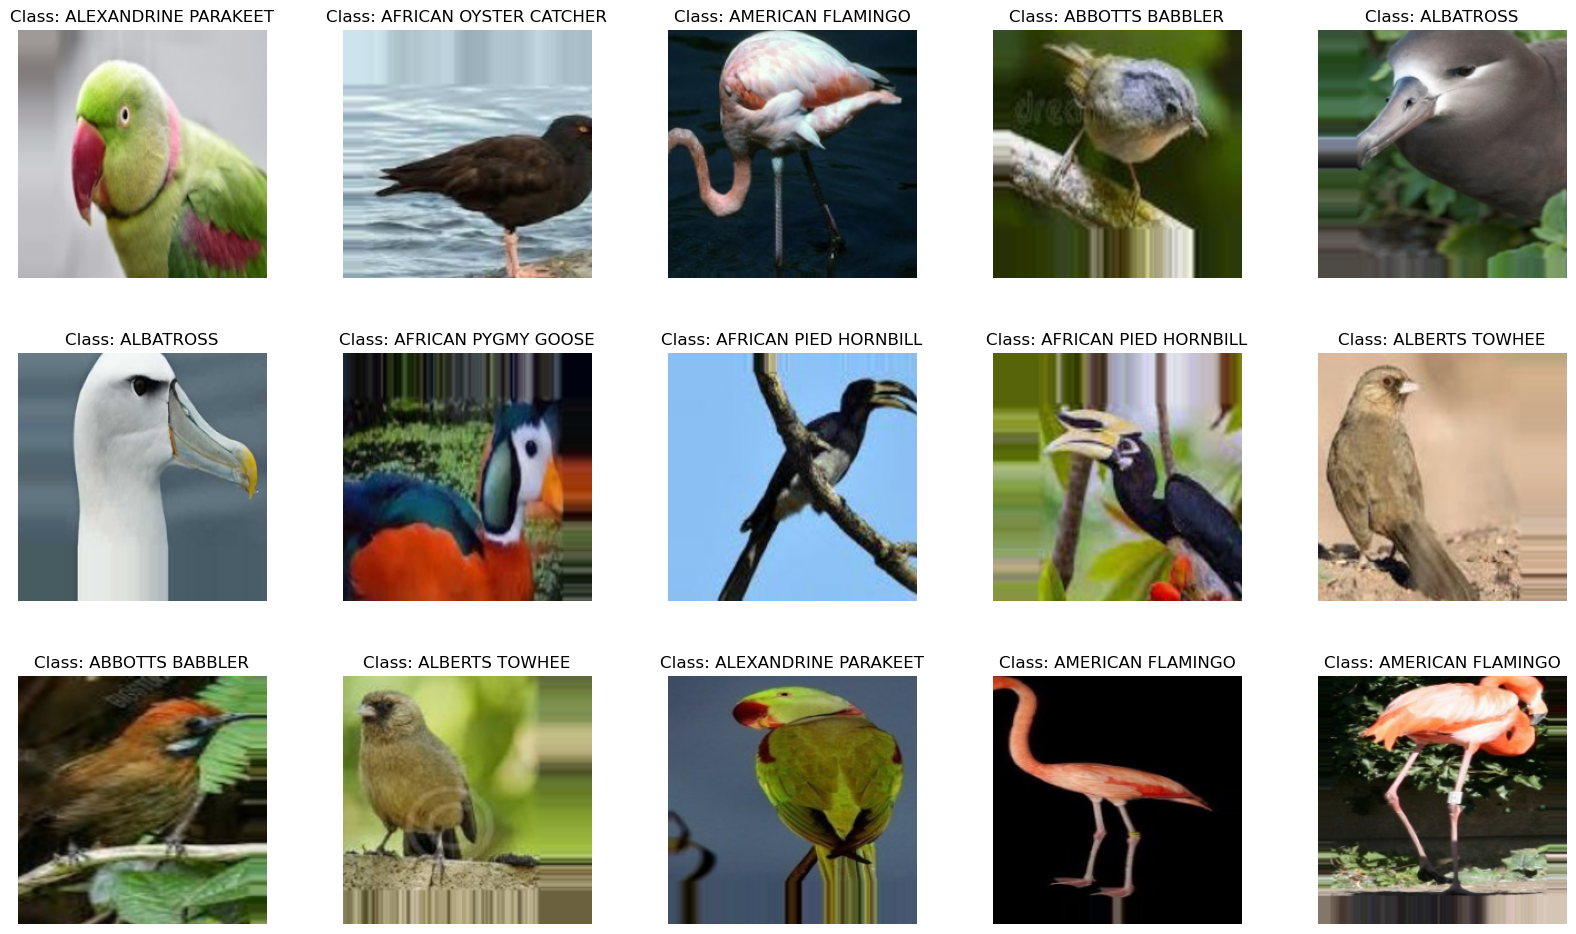

In [6]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [7]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [8]:
img= train_generator[0]
print(img)

(array([[[[0.58708256, 0.5674747 , 0.55571   ],
         [0.58708256, 0.5674747 , 0.55571   ],
         [0.58708256, 0.5674747 , 0.55571   ],
         ...,
         [0.7686275 , 0.78118724, 0.799205  ],
         [0.7686275 , 0.7803922 , 0.8000001 ],
         [0.7686275 , 0.7803922 , 0.8000001 ]],

        [[0.5827474 , 0.5631395 , 0.5513748 ],
         [0.5827474 , 0.5631395 , 0.5513748 ],
         [0.5827474 , 0.5631395 , 0.5513748 ],
         ...,
         [0.77176034, 0.78086966, 0.799205  ],
         [0.77176034, 0.7803922 , 0.8000001 ],
         [0.77176034, 0.7803922 , 0.8000001 ]],

        [[0.574452  , 0.55484414, 0.54307944],
         [0.574452  , 0.55484414, 0.54307944],
         [0.574452  , 0.55484414, 0.54307944],
         ...,
         [0.77647066, 0.7803922 , 0.799205  ],
         [0.77647066, 0.7803922 , 0.8000001 ],
         [0.77647066, 0.7803922 , 0.8000001 ]],

        ...,

        [[0.69411767, 0.6901961 , 0.70980394],
         [0.69411767, 0.6901961 , 0.70980394

In [9]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [10]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 20)


In [11]:
print(len(train_generator))
print(len(test_ds))
print(len(validation_ds))

101
56
57


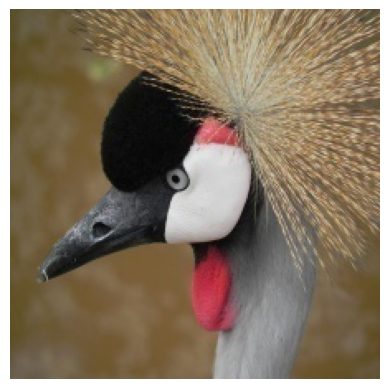

In [12]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/kaggle/input/birds-20-species-image-classification/images to predict/1.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [13]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D



17225924/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128    

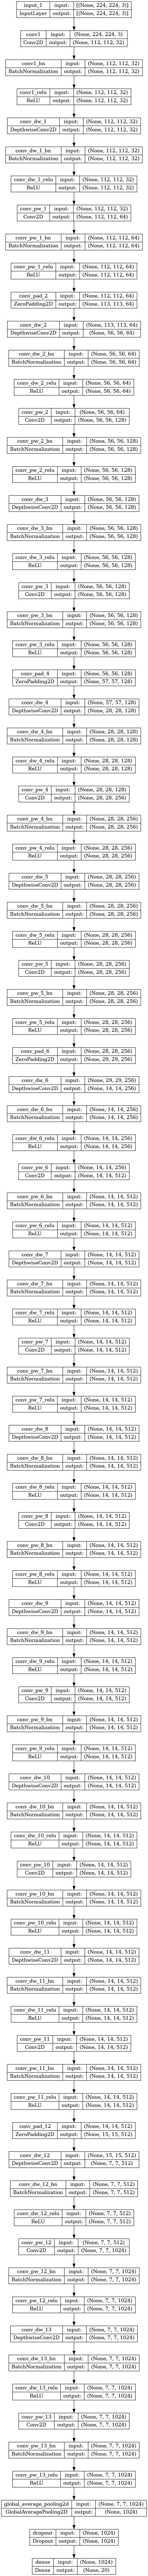

In [14]:
from keras.models import Model
from keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dropout
from keras.layers import Activation, BatchNormalization
from keras.utils import plot_model
from keras.applications.mobilenet import MobileNet
def mobilenet(input_shape):
    input_tensor = Input(shape=input_shape)
    base_model = MobileNet(include_top=False, input_tensor=input_tensor)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(20, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=x)

    return model


input_shape = (224, 224, 3)
num_classes = 20

model = mobilenet(input_shape)
model.summary()
plot_model(model, to_file='mobilenet.png', show_shapes=True)


In [15]:
model = mobilenet((224, 224, 3))



In [16]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [17]:
history =model.fit(train_generator, validation_data=validation_generator, epochs=30)

Epoch 1/30
101/101 [==============================] - 70s 550ms/step - loss: 2.9943 - accuracy: 0.1948 - val_loss: 15.9345 - val_accuracy: 0.0700
Epoch 2/30
101/101 [==============================] - 44s 435ms/step - loss: 2.0439 - accuracy: 0.3878 - val_loss: 9.8353 - val_accuracy: 0.2000
Epoch 3/30
101/101 [==============================] - 44s 430ms/step - loss: 1.6974 - accuracy: 0.4825 - val_loss: 9.5045 - val_accuracy: 0.2000
Epoch 4/30
101/101 [==============================] - 45s 444ms/step - loss: 1.3544 - accuracy: 0.5854 - val_loss: 6.2490 - val_accuracy: 0.2500
Epoch 5/30
101/101 [==============================] - 45s 449ms/step - loss: 1.1757 - accuracy: 0.6406 - val_loss: 6.3113 - val_accuracy: 0.3100
Epoch 6/30
101/101 [==============================] - 45s 444ms/step - loss: 1.0878 - accuracy: 0.6724 - val_loss: 7.0976 - val_accuracy: 0.2900
Epoch 7/30
101/101 [==============================] - 45s 441ms/step - loss: 1.0275 - accuracy: 0.6883 - val_loss: 5.8224 - val_a

In [18]:
n_categories = len(os.listdir('/kaggle/input/birds-20-species-image-classification/test'))# number of categories print(n_categories)

In [19]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,2.994345,0.194825,15.934469,0.07
1,2.043865,0.387781,9.835326,0.20
2,1.697421,0.482544,9.504469,0.20
3,1.354399,0.585411,6.248985,0.25
4,1.175674,0.640586,6.311270,0.31


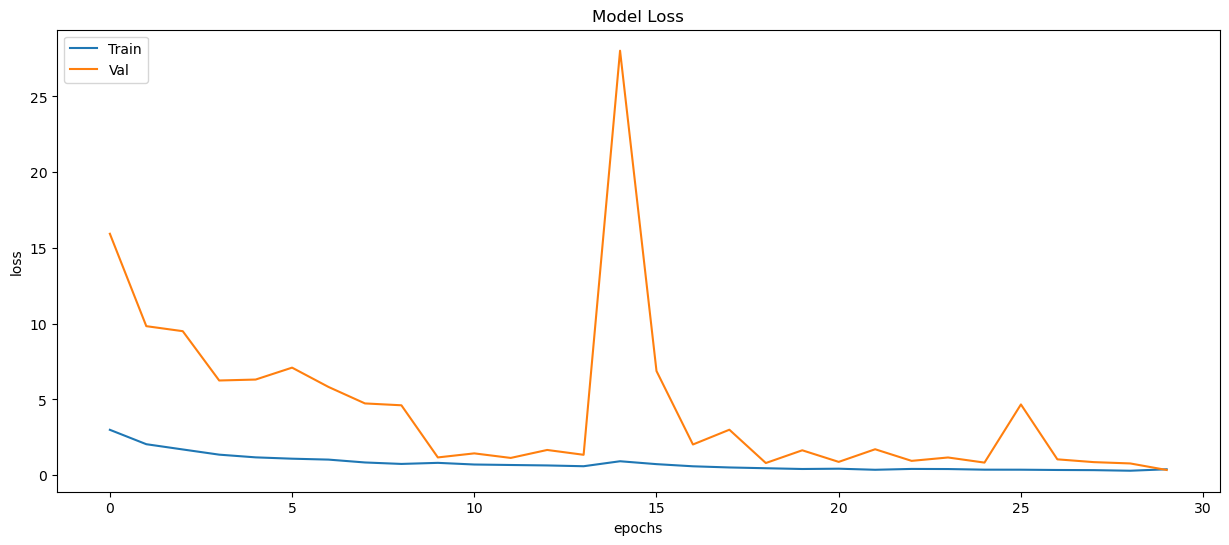

In [20]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

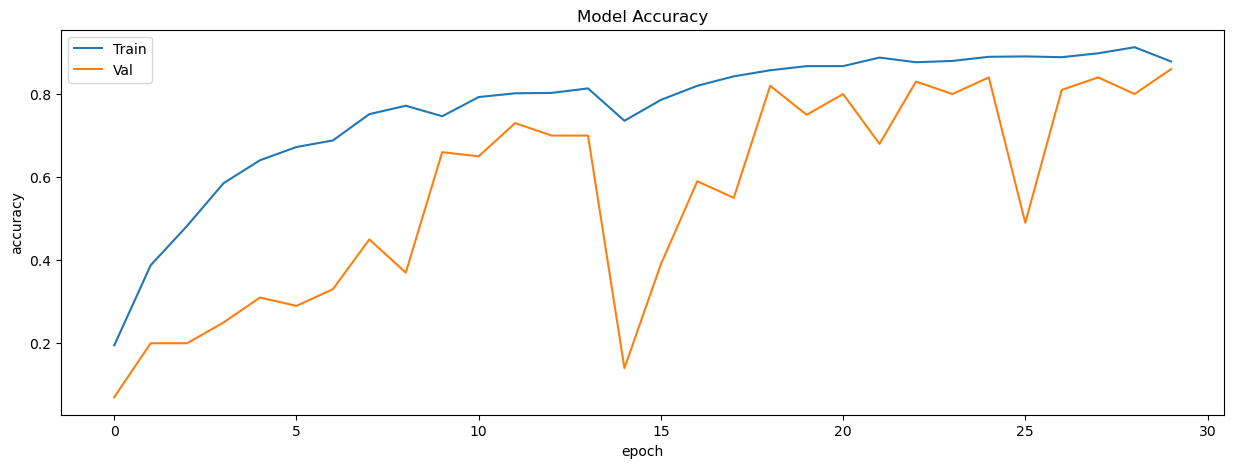

In [21]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [22]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

4/4 [==============================] - 1s 166ms/step


In [23]:
results =model.evaluate(test_generator)

4/4 [==============================] - 0s 87ms/step - loss: 0.4080 - accuracy: 0.8800


In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))


              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.67      0.80      0.73         5
           2       0.83      1.00      0.91         5
           3       0.83      1.00      0.91         5
           4       1.00      0.60      0.75         5
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         5
           7       1.00      0.80      0.89         5
           8       1.00      0.80      0.89         5
           9       0.83      1.00      0.91         5
          10       1.00      1.00      1.00         5
          11       0.62      1.00      0.77         5
          12       1.00      0.60      0.75         5
          13       0.71      1.00      0.83         5
          14       1.00      0.60      0.75         5
          15       1.00      1.00      1.00         5
          16       0.83      1.00      0.91         5
          17       1.00    

1/1 [==============================] - 1s 730ms/step


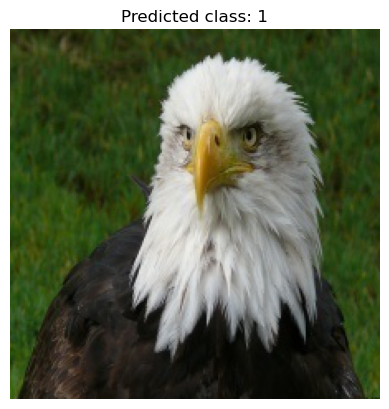

In [26]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/kaggle/input/birds-20-species-image-classification/images to predict'
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()


In [27]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : ABBOTTS BOOBY
Class probability: 0.8669199
Predicted class for 2.jpg : AFRICAN CROWNED CRANE
Class probability: 0.9999864
Predicted class for 3.jpg : AFRICAN CROWNED CRANE
Class probability: 0.99999964
Predicted class for 4.jpg : AFRICAN CROWNED CRANE
Class probability: 0.9999511
Predicted class for 5.jpg : AFRICAN CROWNED CRANE
Class probability: 0.99999976
Predicted class for 6.jpg : AFRICAN CROWNED CRANE
Class probability: 0.9997588
